In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.applications.vgg16 import preprocess_input

import h5py
from PIL import Image
%matplotlib inline
import os, sys
import numpy as np
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [3]:
img_width, img_height = 150, 150

train_data_dir = 'train'
validation_data_dir = 'valid'

In [3]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        if titles is not None:
            sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [4]:
datagen = ImageDataGenerator()

batches = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=4,
        class_mode='binary')

Found 404 images belonging to 2 classes.


In [5]:
imgs,labels = next(batches)

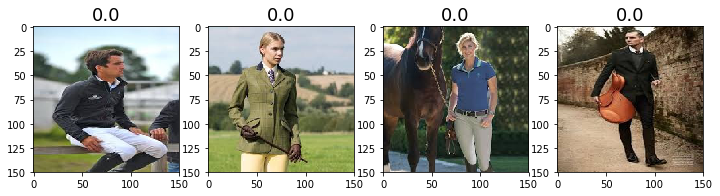

In [6]:
plots(imgs, titles=labels)

In [1]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=16,
        class_mode='binary')

NameError: name 'ImageDataGenerator' is not defined

In [8]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
nb_epoch = 4
nb_train_samples =101
nb_validation_samples =180

In [11]:
model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples,
        epochs=nb_epoch,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples)

Epoch 1/4
101/101 [==============================] - 72s - loss: 0.4925 - acc: 0.7772 - val_loss: 0.2467 - val_acc: 0.8864
Epoch 2/4
101/101 [==============================] - 71s - loss: 0.2367 - acc: 0.9202 - val_loss: 0.0456 - val_acc: 0.9876
Epoch 3/4
101/101 [==============================] - 74s - loss: 0.0737 - acc: 0.9734 - val_loss: 0.0070 - val_acc: 0.9976
Epoch 4/4
101/101 [==============================] - 79s - loss: 0.0567 - acc: 0.9790 - val_loss: 0.0083 - val_acc: 1.0000


In [12]:
model.save('my_model.h5') 

In [13]:
model_yaml = model.to_yaml()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)

In [14]:
model.save_weights('modelwts.h5')

In [25]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.0034960150571499036, 1.0]

In [18]:
imgs = ImageDataGenerator()

batches = imgs.flow_from_directory(
        't1/',
        target_size=(img_width, img_height),
        shuffle=False,
        batch_size=2,
        class_mode=None)

Found 10 images belonging to 1 classes.


In [21]:
probs = model.predict_generator(batches,5)
filenames = batches.filenames

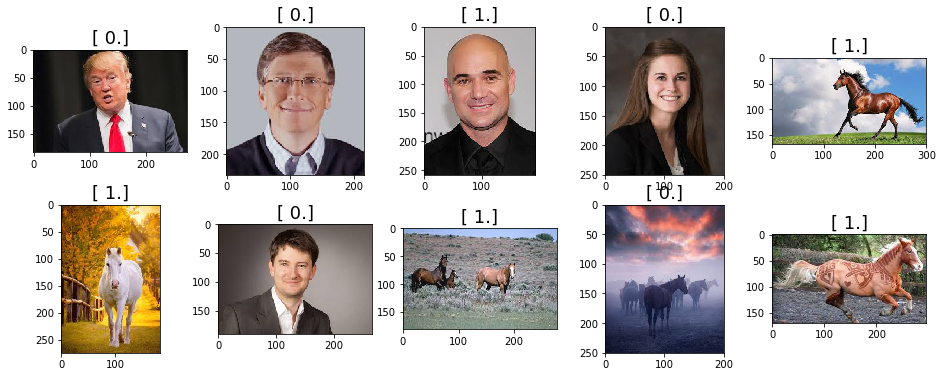

In [22]:
plots([load_img('t1/' + filenames[i]) for i in range(10)], figsize=(16,6),rows=2,titles=probs)